# Importing Libraries

In [1]:
import re
import nltk 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Reading Data Set 

userName       0
Unnamed: 1    40
content        0
appId          0
Sentiment      0
dtype: int64
Shape of Data:  (40, 4)


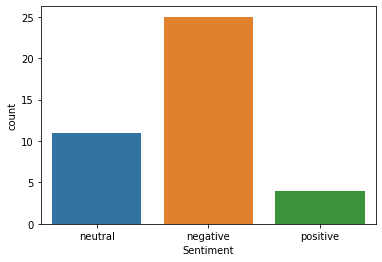

In [2]:
df=pd.read_csv("software reviews_41.csv")
print(df.isnull().sum())
df=df.drop('Unnamed: 1',axis=1)
print("Shape of Data: ",df.shape)
sns.countplot(df['Sentiment'])
plt.show()

In [3]:
df.head()

,userName,content,appId,Sentiment
0,Ratneshwar Prasad Sinha,Upgrade the app,zoom,neutral
1,Arun Kumar,Notification sound not working in samsung s4,zoom,negative
2,Alex Mendez,i dunno why do i always error 103 when i sign in,zoom,negative
3,Weeping Willow,It will not open,zoom,negative
4,Phree Zleva,Wants access to everything. Talk about spy web...,zoom,positive


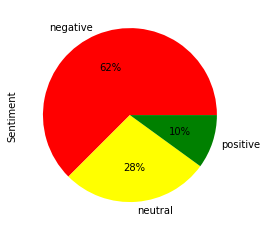

In [4]:
df.Sentiment.value_counts().plot(kind="pie", autopct='%1.0f%%', colors=["red", "yellow", "green"])

# Separating Features and Labels

In [5]:
features=df.iloc[:,1].values
label=df.iloc[:,3].values
print(label)

['neutral' 'negative' 'negative' 'negative' 'positive' 'neutral'
 'negative' 'positive' 'negative' 'negative' 'negative' 'neutral'
 'negative' 'neutral' 'negative' 'negative' 'negative' 'neutral'
 'positive' 'neutral' 'neutral' 'neutral' 'neutral' 'negative' 'neutral'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'neutral' 'negative' 'negative' 'negative' 'negative'
 'negative' 'positive' 'negative']


# Data Cleaning

In [6]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [7]:
processed_features=np.reshape(processed_features,(40,)) 
processed_features.shape

(40,)

In [8]:
label.shape

(40,)

# Applying TFIDF

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [1]:
tfidf_vectorizer=TfidfVectorizer (max_df=0.7, stop_words='english')
processed_features = tfidf_vectorizer.fit_transform(processed_features)
processed_labels = tfidf_vectorizer.fit_transform(label)

NameError: name 'TfidfVectorizer' is not defined

In [12]:
print(processed_labels.shape)
print(processed_features.shape)
print(label.shape)

(40, 3)
(40, 202)
(40,)


# Splitting Data Set

In [13]:
labels=df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(processed_features, label, test_size=0.3)

In [14]:
print(X_train.shape)
print(y_train.shape)

(28, 202)
(28,)


# Applying SVM

In [15]:
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
svm_pred=svm.predict(X_test)

accSVM = accuracy_score(y_test,svm_pred)
accSVM=round(accSVM*100,2)
print(f'Accuracy of SVM : {accSVM}%')

Accuracy of SVM : 83.33%


In [27]:
confusion = confusion_matrix(y_test, svm_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, svm_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, svm_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, svm_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, svm_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, svm_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, svm_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, svm_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, svm_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, svm_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, svm_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, svm_pred, target_names=['Positive', 'Negative', 'Neutral']))

Confusion Matrix

[[10  0  0]
 [ 1  0  0]
 [ 1  0  0]]

Accuracy: 0.83

Micro Precision: 0.83
Micro Recall: 0.83
Micro F1-score: 0.83

Macro Precision: 0.28
Macro Recall: 0.33
Macro F1-score: 0.30

Weighted Precision: 0.69
Weighted Recall: 0.83
Weighted F1-score: 0.76

Classification Report

              precision    recall  f1-score   support

    Positive       0.83      1.00      0.91        10
    Negative       0.00      0.00      0.00         1
     Neutral       0.00      0.00      0.00         1

    accuracy                           0.83        12
   macro avg       0.28      0.33      0.30        12
weighted avg       0.69      0.83      0.76        12



C:\Users\javeria\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Applying Multinomial Naive Byes

In [17]:
NaiveByes = MultinomialNB() 
NaiveByes.fit(X_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
pred_NB = NaiveByes.predict(X_test) 

accuracy_NB = metrics.accuracy_score(y_test, pred_NB)
accuracy_NB=round(accuracy_NB*100,2)
print(f'Accuracy of Naive Byes Model : {accuracy_NB}%')

Accuracy of Naive Byes Model : 83.33%


In [28]:
confusion = confusion_matrix(y_test, pred_NB)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred_NB)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred_NB, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred_NB, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred_NB, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred_NB, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred_NB, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred_NB, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred_NB, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred_NB, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred_NB, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred_NB, target_names=['Positive', 'Negative', 'Neutral']))

Confusion Matrix

[[9 1 0]
 [0 1 0]
 [1 0 0]]

Accuracy: 0.83

Micro Precision: 0.83
Micro Recall: 0.83
Micro F1-score: 0.83

Macro Precision: 0.47
Macro Recall: 0.63
Macro F1-score: 0.52

Weighted Precision: 0.79
Weighted Recall: 0.83
Weighted F1-score: 0.81

Classification Report

              precision    recall  f1-score   support

    Positive       0.90      0.90      0.90        10
    Negative       0.50      1.00      0.67         1
     Neutral       0.00      0.00      0.00         1

    accuracy                           0.83        12
   macro avg       0.47      0.63      0.52        12
weighted avg       0.79      0.83      0.81        12



# Applying Passive Aggressive Classifier

In [19]:
PA_Model=PassiveAggressiveClassifier()
PA_Model.fit(X_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [20]:
pred_PA=PA_Model.predict(X_test)

accuracy_PA=accuracy_score(y_test,pred_PA)
accuracy_PA=round(accuracy_PA*100,2)
print(f'Accuracy of Passive Aggressive Model : {accuracy_PA}%')

Accuracy of Passive Aggressive Model : 75.0%


In [29]:
confusion = confusion_matrix(y_test, pred_PA)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred_PA)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred_PA, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred_PA, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred_PA, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred_PA, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred_PA, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred_PA, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred_PA, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred_PA, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred_PA, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred_PA, target_names=['Positive', 'Negative', 'Neutral']))

Confusion Matrix

[[8 2 0]
 [0 1 0]
 [1 0 0]]

Accuracy: 0.75

Micro Precision: 0.75
Micro Recall: 0.75
Micro F1-score: 0.75

Macro Precision: 0.41
Macro Recall: 0.60
Macro F1-score: 0.45

Weighted Precision: 0.77
Weighted Recall: 0.75
Weighted F1-score: 0.74

Classification Report

              precision    recall  f1-score   support

    Positive       0.89      0.80      0.84        10
    Negative       0.33      1.00      0.50         1
     Neutral       0.00      0.00      0.00         1

    accuracy                           0.75        12
   macro avg       0.41      0.60      0.45        12
weighted avg       0.77      0.75      0.74        12



# Applying Decision Tree

In [21]:
model_Tree=tree.DecisionTreeClassifier(criterion="entropy")
model_Tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
DT_predict=model_Tree.predict(X_test)

acc_DT=accuracy_score(y_test,DT_predict)
acc_DT=round(acc_DT*100,2)
print(f'Accuracy of Decision Tree : {acc_DT}%')

Accuracy of Decision Tree : 91.67%


In [30]:
confusion = confusion_matrix(y_test, DT_predict)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, DT_predict)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, DT_predict, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, DT_predict, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, DT_predict, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, DT_predict, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, DT_predict, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, DT_predict, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, DT_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, DT_predict, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, DT_predict, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, DT_predict, target_names=['Positive', 'Negative', 'Neutral']))

Confusion Matrix

[[10  0  0]
 [ 0  1  0]
 [ 1  0  0]]

Accuracy: 0.92

Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

Macro Precision: 0.64
Macro Recall: 0.67
Macro F1-score: 0.65

Weighted Precision: 0.84
Weighted Recall: 0.92
Weighted F1-score: 0.88

Classification Report

              precision    recall  f1-score   support

    Positive       0.91      1.00      0.95        10
    Negative       1.00      1.00      1.00         1
     Neutral       0.00      0.00      0.00         1

    accuracy                           0.92        12
   macro avg       0.64      0.67      0.65        12
weighted avg       0.84      0.92      0.88        12



# Applying Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

text_classifier_RF = RandomForestClassifier()
text_classifier_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
predictions_RF= text_classifier_RF.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_RF=accuracy_score(y_test,predictions_RF)
accuracy_RF=round(accuracy_RF*100,2)
print(f'Accuracy of RF Model : {accuracy_RF}%')
confusion = confusion_matrix(y_test, predictions_RF)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions_RF)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, predictions_RF, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, predictions_RF, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, predictions_RF, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, predictions_RF, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, predictions_RF, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, predictions_RF, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, predictions_RF, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, predictions_RF, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, predictions_RF, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, predictions_RF, target_names=['Positive', 'Negative', 'Neutral']))

Accuracy of RF Model : 75.0%
Confusion Matrix

[[9 1 0]
 [1 0 0]
 [1 0 0]]

Accuracy: 0.75

Micro Precision: 0.75
Micro Recall: 0.75
Micro F1-score: 0.75

Macro Precision: 0.27
Macro Recall: 0.30
Macro F1-score: 0.29

Weighted Precision: 0.68
Weighted Recall: 0.75
Weighted F1-score: 0.71

Classification Report

              precision    recall  f1-score   support

    Positive       0.82      0.90      0.86        10
    Negative       0.00      0.00      0.00         1
     Neutral       0.00      0.00      0.00         1

    accuracy                           0.75        12
   macro avg       0.27      0.30      0.29        12
weighted avg       0.68      0.75      0.71        12

